#                                 CLUSTERING ASSIGNMENT

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. 

After the recent funding programmes, they have been able to raise around $10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

We need to:

- Categorise the countries using some socio-economic and health factors that determine the overall development of the country
- Suggest the countries which the CEO needs to focus on the most

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scale
from sklearn.preprocessing import StandardScaler

# KMeans Clustering
from sklearn.cluster import KMeans

# Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Steps to be followed in Assignment


1. Data Quality Check
2. EDA: Univariate / Bivariate Analysis
3. Outlier Treatment
4. Scaling
5. Check the cluster tendancy: Hopkin's Test
6. Find the best value of k: SSD, Silhoutte Score
7. Using the final value of k, perform final KMeans Analysis
8. Visualize the cluster using a scatter plots
9. Perform Cluster profiling: GDPP, CHILD_MORT, and INCOME
10.Hierarchial Clustering

a) Single Linkage: Dendrogram

b) Complete Linkage: Dendrogram

c) Use one of them for the final clusters

d) Visualize using the scatter plot

e) Perform Cluster profiling: GDPP, CHILD_MORT, and INCOME

In [3]:
## Loading the data

df = pd.read_csv("Country-data.csv")

In [4]:
# Read the dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# shape of the data set
df.shape

(167, 10)

In [6]:
# data set info check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# checking the numerical columns
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data Qaulity Check

In [8]:
## checking for null values
df.isnull().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
# Convert exports, imports and health spending percentages tpo absolute values
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [11]:
## data after coversion
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [12]:
## rounding the valaues upto decimal 2

df = df.round(2)

In [13]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


## EDA

In [14]:

# Numerical cols

col = df.describe().columns
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Unviariate Analysis
Performing univariate analysis on countries using socio-economic and other variables that determine overall health of a country.

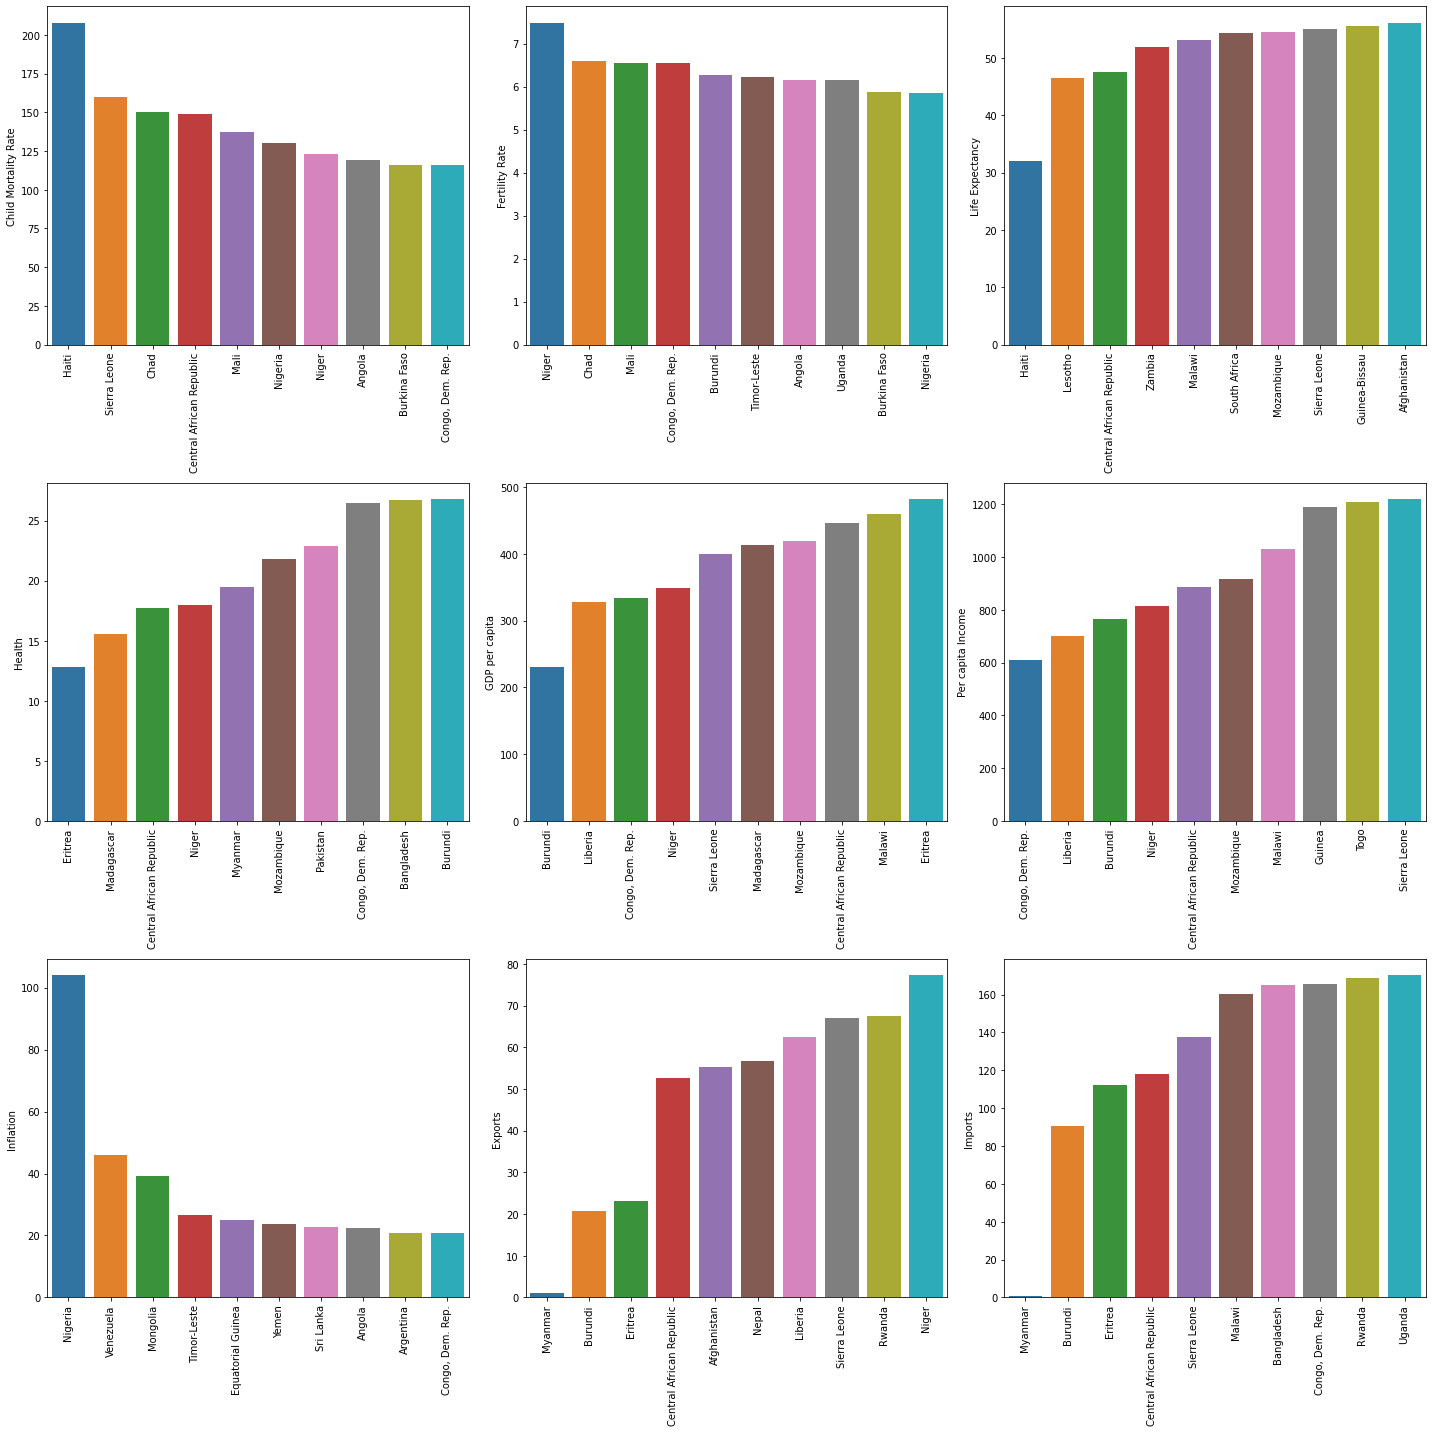

In [15]:
fig, axs = plt.subplots(3,3,figsize = (20,20))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')

# Health :Total health spending as %age of Total GDP.

bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

# Income : Net income per person

bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same

top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

Top 5 countries with:

- High child mortality rate: Haiti, Sierra Leone, Chad, Central African Republic, Mali
- High fertility rate: Niger, Chad, Mali, Congo Dem. Rep., Burundi
- Low life expectancy rate: Haiti, Lesotho, Central African Republic, Zambia, Malawi
- Low health spending: Eritrea, Madagascar, Central African Republic, Niger, Myanmar
- Low GDP per capita: Burundi, Liberia, Congo, Dem. Rep., Niger, Sierra Leone
- Low per capital income: Congo, Dem. Rep., Liberia, Burundi, Niger, Central African Republic
- High inflation rate: Nigeria, Venezuela, Mongolia, Timor-Leste, Equatorial Guinea
- Low exports: Myanmar, Burundi, Eritrea, Central African Republic, Afghanistan
- Low imports: Myanmar, Burundi, Eritrea, Central African Republic, Sierra Leone

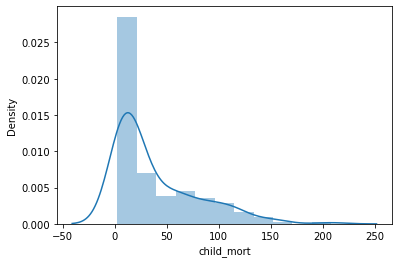

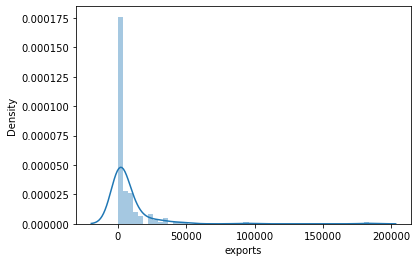

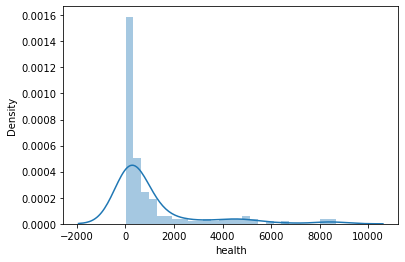

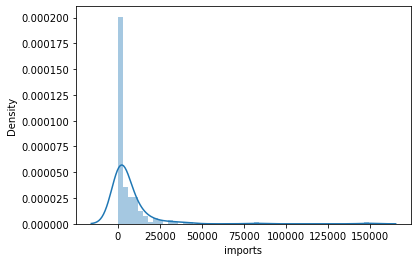

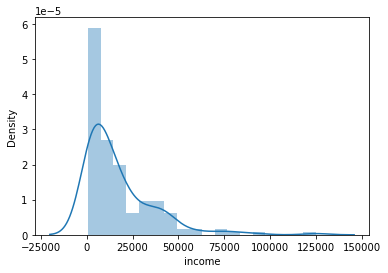

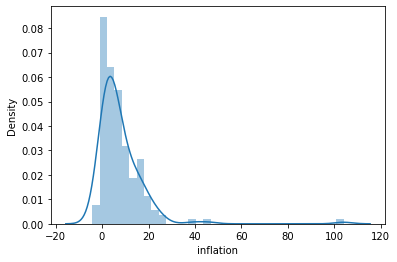

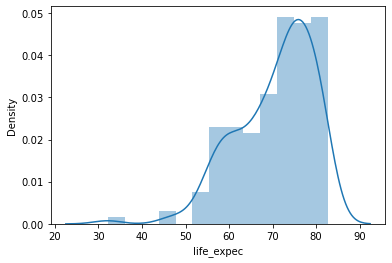

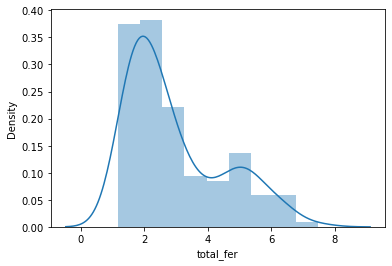

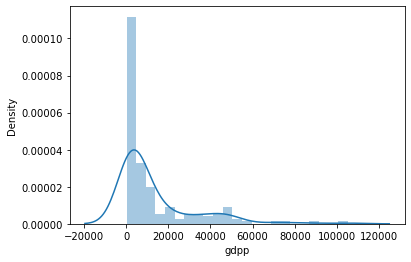

In [16]:
# distplot

for c in col:
    sns.distplot(df[c])
    plt.show();

In [17]:
# We see that all the coloums are normally distributed 
## income wise - we can see that most of the counters are in the range : 0- 25,000 
## inflation range : 0 - 20
## gdpp in the range of : 0 - 20,000

# 4. Bivariate Analysis

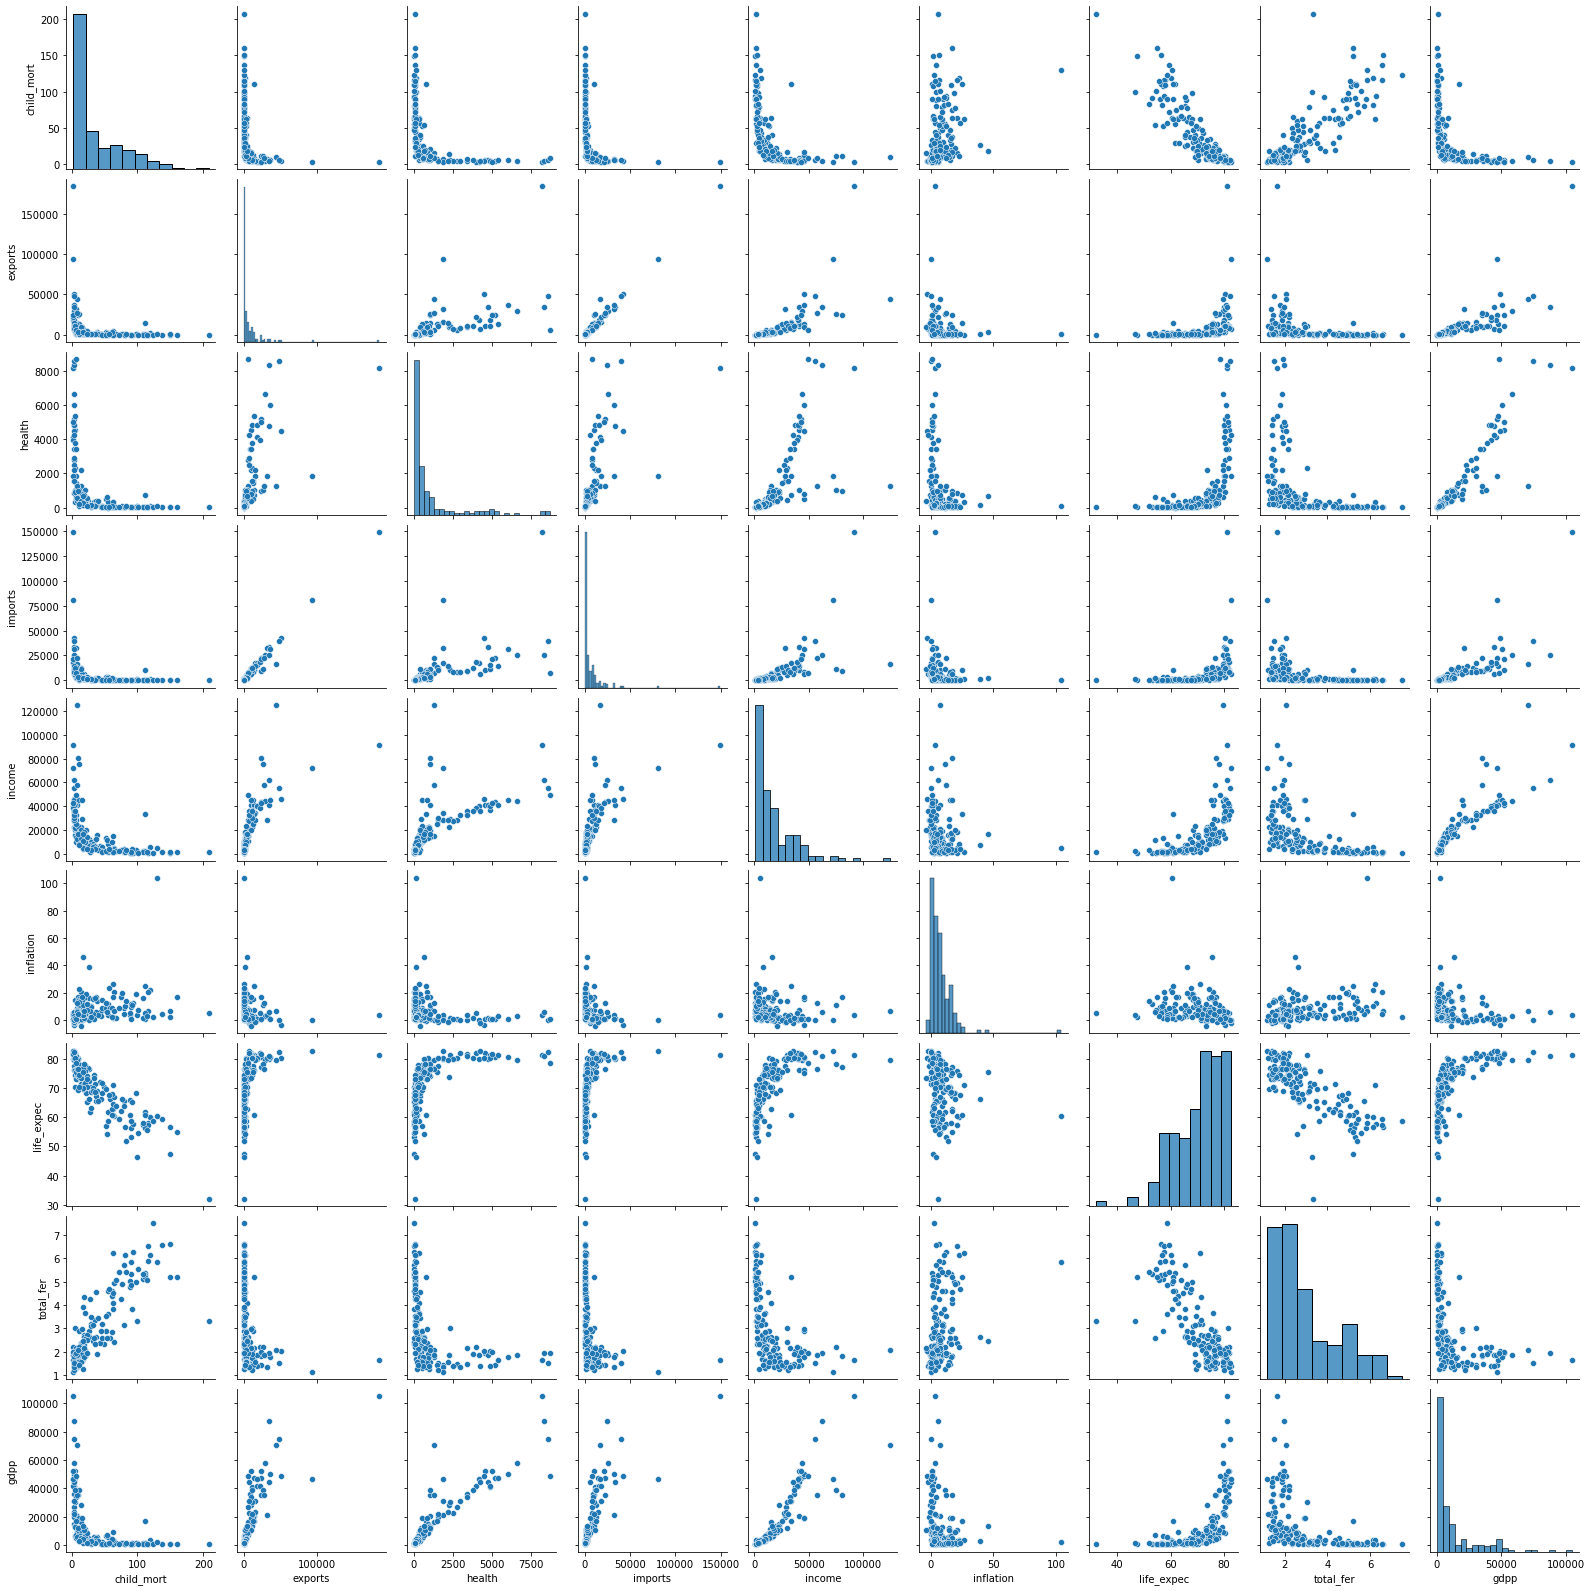

In [18]:
# Pairwise scatter plot
sns.pairplot(df[col])
plt.show()

In [19]:
# Correlation matrix
cor = df[col].corr()
cor

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288275,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141559,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253951,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179466,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147759,0.611962,-0.501840,0.895571
inflation,0.288275,-0.141559,-0.253951,-0.179466,-0.147759,1.000000,-0.239707,0.316921,-0.221629
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239707,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221629,0.600089,-0.454910,1.000000


<AxesSubplot:>

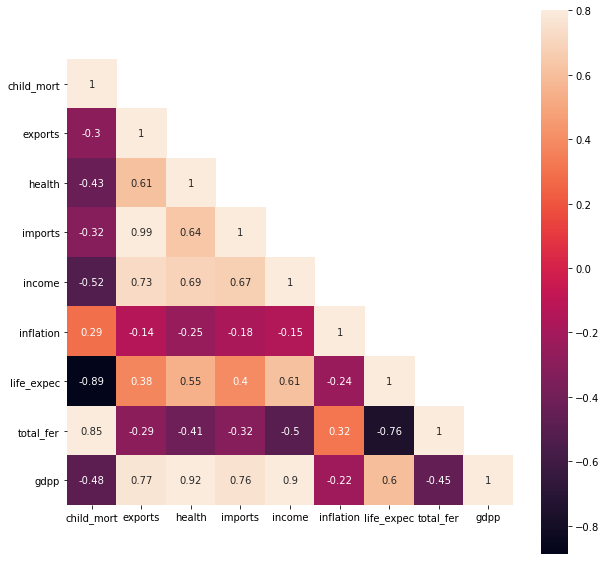

In [20]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

Inference:
- child_mort and life_expec are highly negatively correlated with correlation value of -0.89
- life_expec and total_fer are highly negatively correlated with correlation value of -0.76
- gdpp and income are highly positively correlated with correlation value of 0.90
- child_mort and total_fer are highly positively correlated with correlation value of 0.85
- exports and imports are highly positively correlated with correlation value of 0.99

# Outlier Treatment

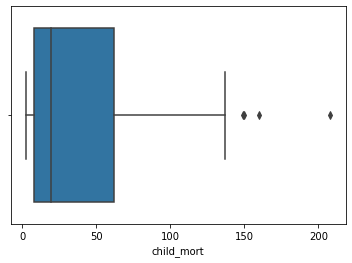

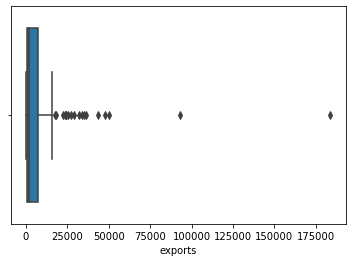

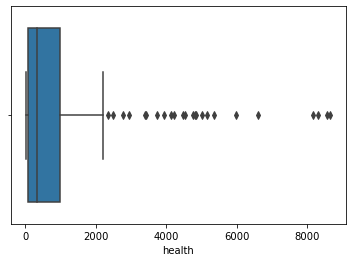

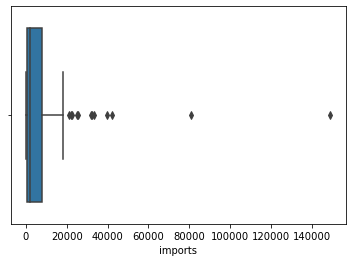

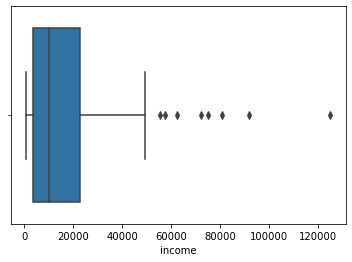

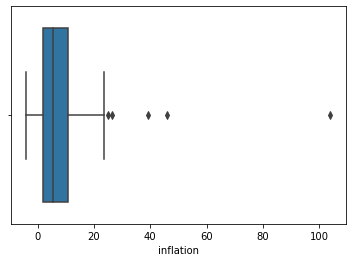

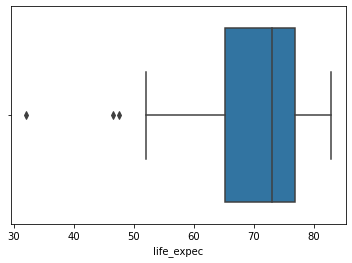

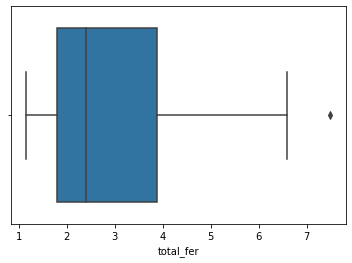

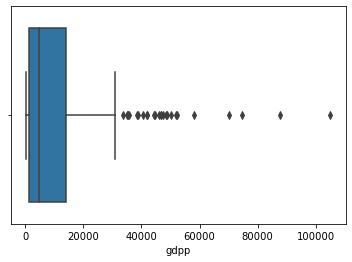

In [21]:
for c in col:
    sns.boxplot(df[c])
    plt.show();

In [22]:
#According to our assignment and Business Problem

#For columns such as CHILD_MORT, INFLATION, TOTAL_FERTI, we should not do anything to the upper range outliers, but we may deal with the lower range outliers (capping).

#For rest of the columns, we should not do anything with the lower range outliers but you may deal with the upper range outliers (capping).


In [23]:
def outlier_treatment(df, col):
    
    Q1 = df[col].quantile(0.1)

    Q3 = df[col].quantile(0.99)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [24]:
df = outlier_treatment(df, 'child_mort')
df = outlier_treatment(df, 'exports')
df = outlier_treatment(df, 'health')
df = outlier_treatment(df, 'imports')
df = outlier_treatment(df, 'income')
df = outlier_treatment(df, 'inflation')
df = outlier_treatment(df, 'life_expec')
df = outlier_treatment(df, 'total_fer')
df = outlier_treatment(df, 'gdpp')

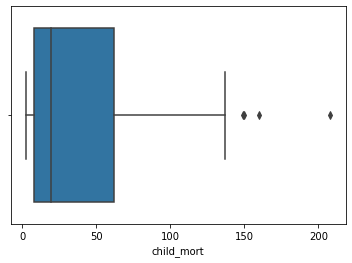

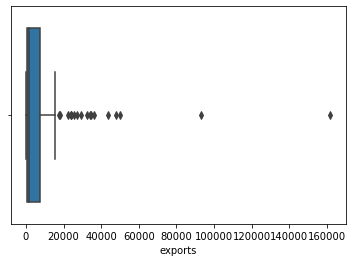

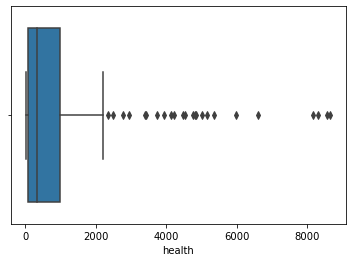

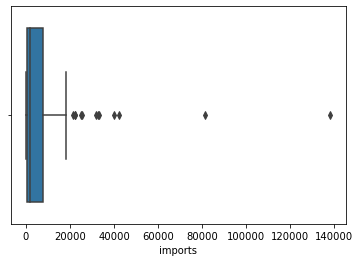

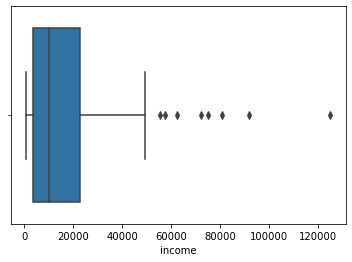

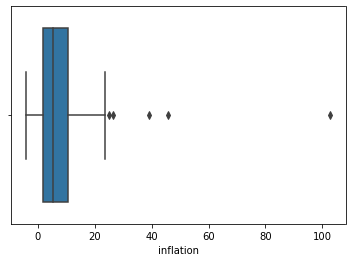

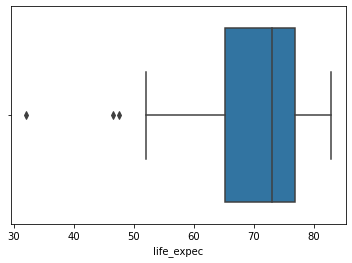

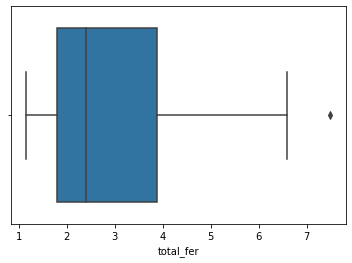

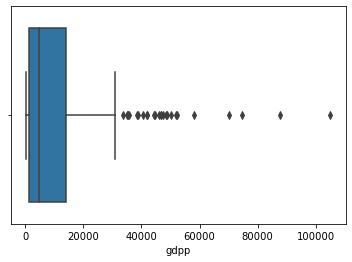

In [25]:
## all outliers are treated by upper and lower capping

for c in col:
    sns.boxplot(df[c])
    plt.show();
    

# 6. Hopkins Statistics

To check how well the data can be clustered.

In [26]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
# How different your data is from randomly scattered data
for i in range(20):
    print(hopkins(df.drop('country', axis=1)),end=' | ')

0.9489020441343814 | 0.9711352676555407 | 0.9461056447631485 | 0.8951153413030248 | 0.9069464969733902 | 0.8800438150813282 | 0.9806038065749143 | 0.9122815169234327 | 0.8803154584638889 | 0.8964131090437091 | 0.982632676654443 | 0.9862944105235607 | 0.9725691595901024 | 0.9836909315699155 | 0.9817095511010401 | 0.8528215054790912 | 0.928422193997822 | 0.9445218346673493 | 0.9688644839754282 | 0.9342434230346187 | 

Since, the hopkins value is between {0.8 - 0.99}, it means data has a high tendency to cluster.

# 7. Scaling data

In [28]:
# Dropping Country field as final dataframe will only contain data columns

countries_df1 = df.drop('country',axis=1)

countries_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0


In [29]:
scaler=StandardScaler()

In [30]:
# Scaling the dataset with Standard Scaler 

countries_df1 = scaler.fit_transform(countries_df1)

In [31]:
countries_df1

array([[ 1.29153238, -0.43411741, -0.56503842, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.36871178, -0.43921488, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.33465932, -0.48482717, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.38083393, -0.53849064, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.4138518 , -0.55059527, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.40501823, -0.54050066, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [32]:
countries_df1 = pd.DataFrame(countries_df1)
countries_df1.columns = col
countries_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.434117,-0.565038,-0.446935,-0.808245,0.158986,-1.619092,1.902882,-0.679180
1,-0.538949,-0.368712,-0.439215,-0.323029,-0.375369,-0.313581,0.647866,-0.859973,-0.485623
2,-0.272833,-0.334659,-0.484827,-0.364864,-0.220844,0.794804,0.670423,-0.038404,-0.465376
3,2.007808,-0.305461,-0.532366,-0.356749,-0.585043,1.396252,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104317,-0.178771,0.047245,0.101732,-0.604758,0.704258,-0.541946,-0.041817


# 8. K-means Clustering

# Finding the Optimal Number of Clusters

In [33]:
##Find the best value of k: SSD, Silhoutte Score

# Silhoutte Score

In [34]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(countries_df1)
    ss.append([k, silhouette_score(countries_df1, kmean.labels_)])
    
ss

[[2, 0.4600469092377078],
 [3, 0.4211683904221625],
 [4, 0.4289627790193667],
 [5, 0.431913691336747],
 [6, 0.3363835359494126],
 [7, 0.3147110553943665],
 [8, 0.3066304562546501],
 [9, 0.29492595219603107],
 [10, 0.2960182234365601]]

In [35]:
sil = pd.DataFrame(ss)
sil

,0,1
0,2,0.460047
1,3,0.421168
2,4,0.428963
3,5,0.431914
4,6,0.336384
5,7,0.314711
6,8,0.306630
7,9,0.294926
8,10,0.296018


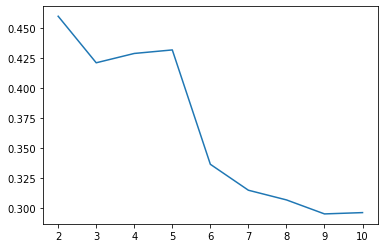

In [36]:
plt.plot(sil[0], sil[1]);

# SSD: Elbow

In [37]:


ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(countries_df1)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 933.6593706300359],
 [3, 642.4499885338474],
 [4, 477.36058360189907],
 [5, 406.80457045949987],
 [6, 349.2893936685722],
 [7, 316.50534083423884],
 [8, 275.696017472195],
 [9, 246.75019936599284],
 [10, 215.6425101398702]]

In [38]:
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,933.659371
1,3,642.449989
2,4,477.360584
3,5,406.804570
4,6,349.289394
5,7,316.505341
6,8,275.696017
7,9,246.750199
8,10,215.642510


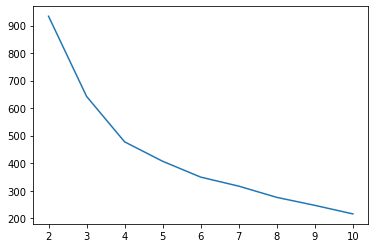

In [39]:
plt.plot(ssd[0],ssd[1]);

### Final KMeans with K==3


# Using the final value of K for KMeans Analysis

In [40]:
# final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=100, random_state = 100)
kmeans.fit(countries_df1)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [41]:
# Centroids
kmeans.cluster_centers_

array([[ 1.32661038, -0.3846828 , -0.52444723, -0.40571003, -0.68923797,
         0.392543  , -1.27627565,  1.3543418 , -0.60496339],
       [-0.44550624, -0.22114857, -0.28365916, -0.20031525, -0.16527697,
        -0.06723101,  0.32760944, -0.47234163, -0.27275434],
       [-0.82629395,  1.37818908,  1.82094465,  1.34652746,  1.71870094,
        -0.45443008,  1.12317044, -0.78661849,  1.92353171]])

In [42]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [43]:
# Now we will assign labels to our original df
df['labels'] = kmeans.labels_

In [44]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,1


In [45]:
df['labels'].value_counts()

1    91
0    48
2    28
Name: labels, dtype: int64

# Visualize the cluster using a Box and scatter plots

### Box plots

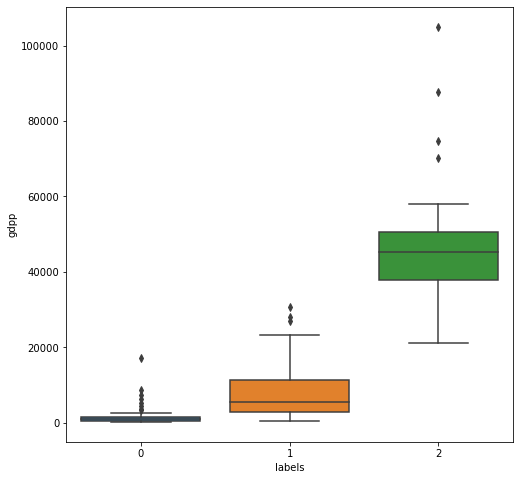

In [46]:
# plots
plt.figure(figsize = (8,8))
sns.boxplot(x='labels', y='gdpp', data=df)
plt.show()


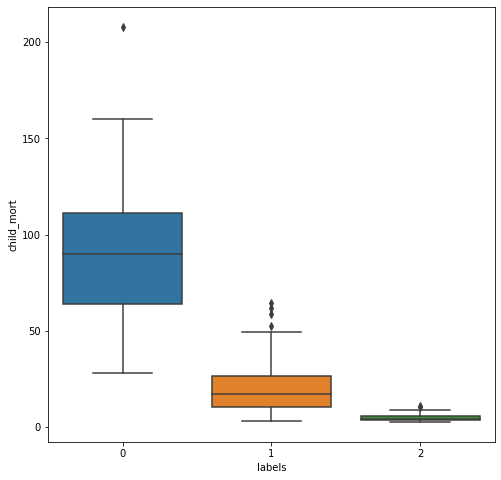

In [47]:
plt.figure(figsize = (8,8))
sns.boxplot(x='labels', y='child_mort', data=df)
plt.show()


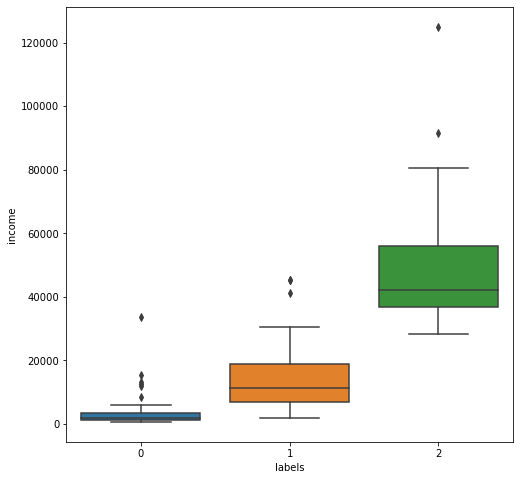

In [48]:
plt.figure(figsize = (8,8))
sns.boxplot(x='labels', y='income', data=df)
plt.show()

### Scatter plots

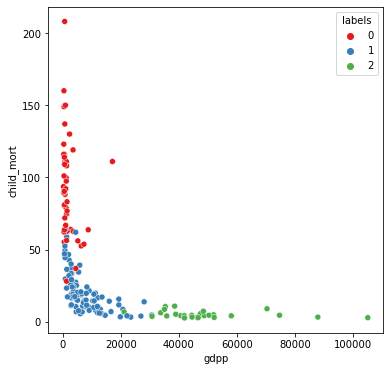

In [49]:
plt.figure(figsize = (6,6))
sns.scatterplot(x='gdpp', y='child_mort', hue='labels', data=df, palette='Set1');

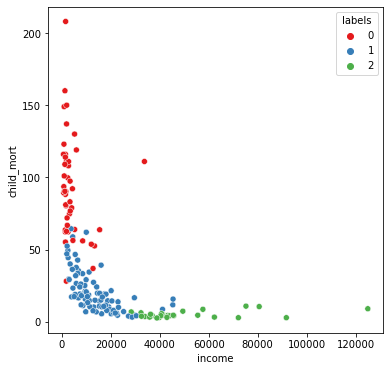

In [50]:
plt.figure(figsize = (6,6))
sns.scatterplot(x='income', y='child_mort', hue='labels', data=df, palette='Set1');

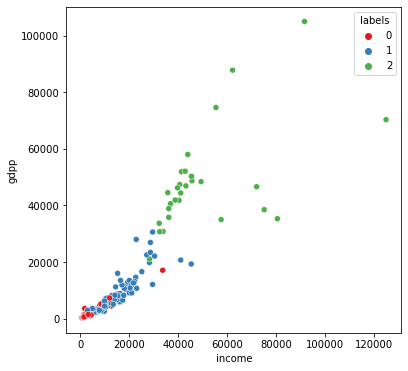

In [51]:
plt.figure(figsize = (6,6))
sns.scatterplot(x='income', y='gdpp', hue='labels', data=df, palette='Set1');

### Cluster profiling

In [52]:
df[['gdpp','child_mort','income','labels']].groupby('labels').mean()

,gdpp,child_mort,income
labels,,,
0,1909.208333,91.610417,3897.354167
1,7979.912088,20.357143,13968.021978
2,48114.285714,5.046429,50178.571429


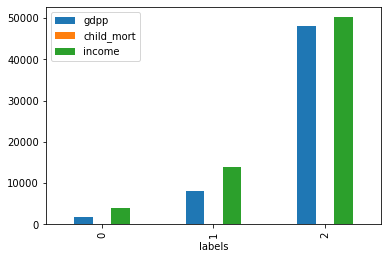

In [53]:
df[['gdpp','child_mort','income','labels']].groupby('labels').mean().plot(kind='bar');

### BAR GRAPH

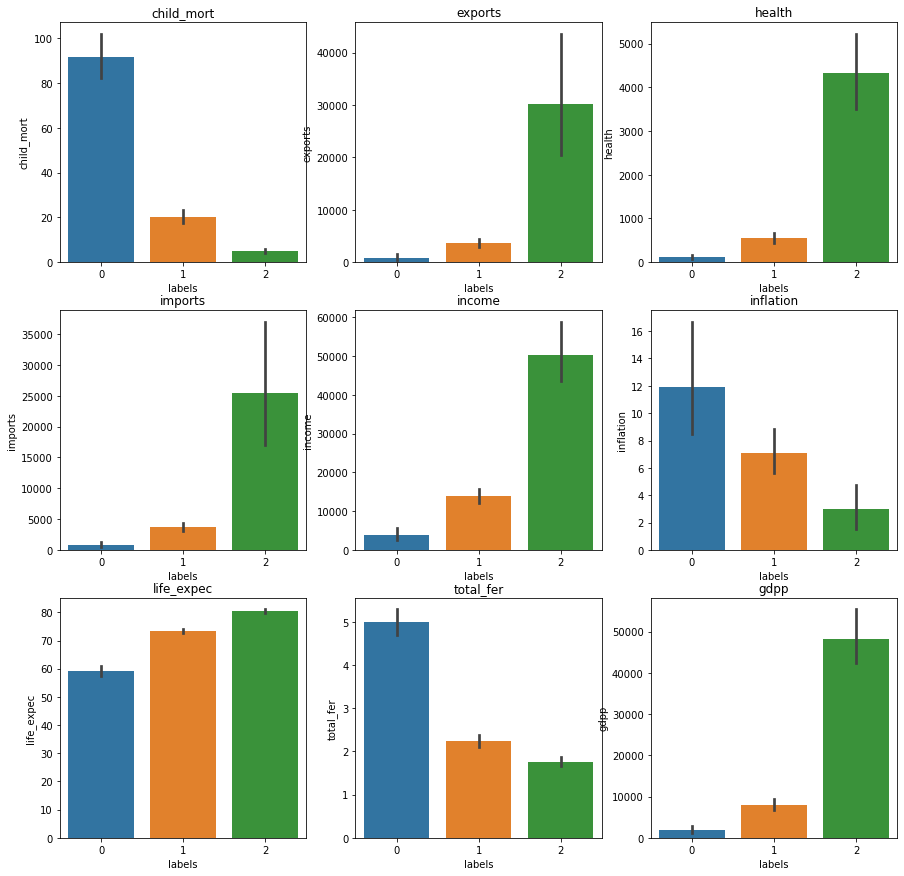

In [54]:
plt.figure(figsize = (15,15))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort")
sns.barplot(df.labels, df.child_mort)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports")
sns.barplot(df.labels, df.exports)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health")
sns.barplot(df.labels, df.health)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports")
sns.barplot(df.labels, df.imports)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income")
sns.barplot(df.labels, df.income)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation")
sns.barplot(df.labels, df.inflation)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec")
sns.barplot(df.labels, df.life_expec)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer")
sns.barplot(df.labels, df.total_fer)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp")
sns.barplot(df.labels, df.gdpp)

plt.show()

Inference:
    
- Developed countries: Labels 2
- Developing countries: Labels 1
- Under-developed countries: Labels 0

### Labels 0 has high child mortality, low exports, low health spending, low imports, low income, high inflation, low life expectancy, high fertility, and low GDP per capita. Therefore, this cluster will be our focus.

In [55]:
#Finding the observations that belong to labels = 0



In [56]:
c1 = df[df['labels']==0]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.40,31.08,281.98,1820.0,0.880,61.8,5.36,758.0,0
21,Botswana,52.5,2768.60,527.05,3257.55,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.40,38.76,170.20,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.82,67.20,353.70,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.88,34.68,397.57,1410.0,3.870,65.9,4.75,769.0,0


In [57]:


country_list1 = c1.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False])
Top_10 = country_list1.reset_index().drop('index',axis=1)
Top_10.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.26,231.0,0
1,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.02,327.0,0
2,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.54,334.0,0
3,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,7.49,348.0,0
4,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,0
5,Madagascar,62.2,103.25,15.57,177.59,1390.0,8.79,60.8,4.60,413.0,0
6,Mozambique,101.0,131.99,21.83,193.58,918.0,7.64,54.5,5.56,419.0,0
7,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446.0,0
8,Malawi,90.5,104.65,30.25,160.19,1030.0,12.10,53.1,5.31,459.0,0
9,Eritrea,55.2,23.09,12.82,112.31,1420.0,11.60,61.7,4.61,482.0,0


In [58]:
top_10 = Top_10.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Burundi
1,Liberia
2,"Congo, Dem. Rep."
3,Niger
4,Sierra Leone
5,Madagascar
6,Mozambique
7,Central African Republic
8,Malawi
9,Eritrea


# 9. Hierarchical Clustering

### Finding the Optimal Number of Clusters

In [59]:
### Single linkage

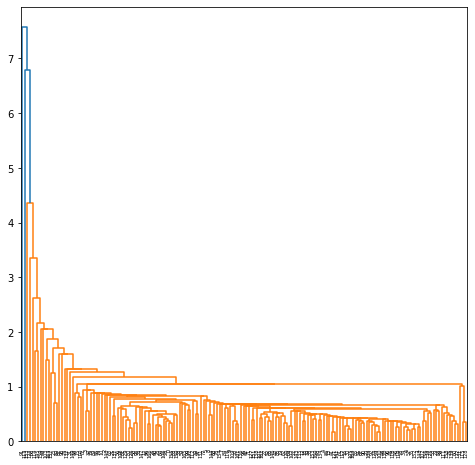

In [60]:
plt.figure(figsize = (8,8))
mergings_single = linkage(countries_df1, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

In [61]:
###Complete linkage

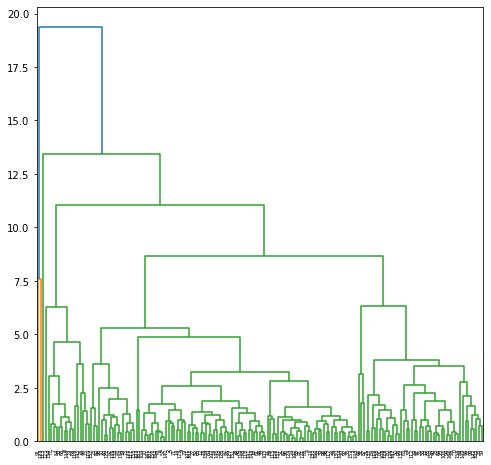

In [62]:
plt.figure(figsize = (8,8))
mergings_complete = linkage(countries_df1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

We are not able to find clusters properly using single linkage. However, from complete linkage we can see clear clusters.

### Looking at dendrogram of hierarchical clustering there seem to be 3 main clusters

In [63]:
# 3 clusters
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
# assign cluster labels
df_hm = pd.concat([df, pd.Series(cluster_labels)], axis = 1)
df_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels','labels']
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,1,0


In [66]:
df_hm

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.93,1565.19,2950.0,2.62,63.0,3.50,2970.0,1,0
163,Venezuela,17.1,3847.50,662.85,2376.00,16500.0,45.90,75.4,2.47,13500.0,1,0
164,Vietnam,23.3,943.20,89.60,1050.62,4490.0,12.10,73.1,1.95,1310.0,1,0
165,Yemen,56.3,393.00,67.86,450.64,4480.0,23.60,67.5,4.67,1310.0,0,0


In [67]:
## counting labels
df_hm['cluster_labels'].value_counts()

1    91
0    48
2    28
Name: cluster_labels, dtype: int64

In [68]:
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,1,0


### Data Visualization

<AxesSubplot:xlabel='cluster_labels', ylabel='gdpp'>

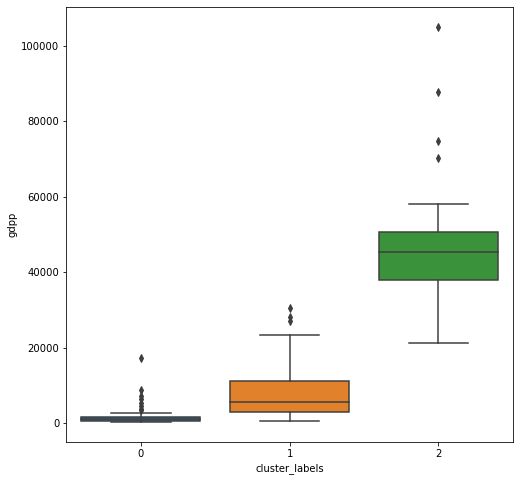

In [69]:
# plots
plt.figure(figsize = (8,8))
sns.boxplot(x='cluster_labels', y='gdpp', data=df_hm)

<AxesSubplot:xlabel='cluster_labels', ylabel='child_mort'>

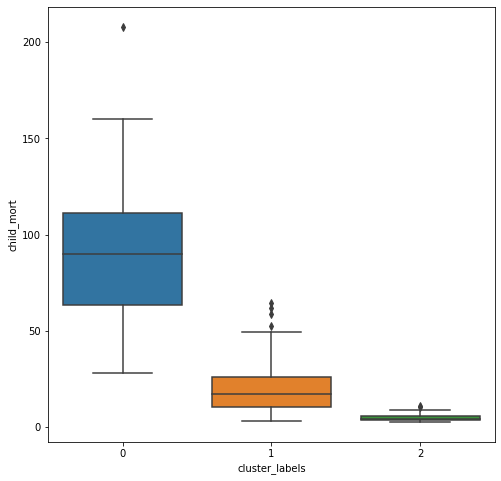

In [70]:
# plots
plt.figure(figsize = (8,8))
sns.boxplot(x='cluster_labels', y='child_mort', data=df_hm)

<AxesSubplot:xlabel='cluster_labels', ylabel='income'>

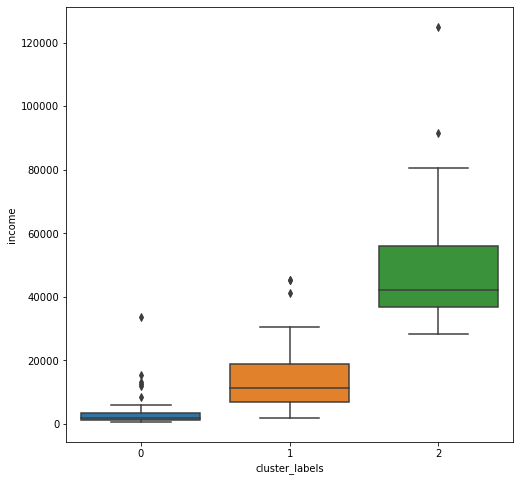

In [71]:
# plots
plt.figure(figsize = (8,8))
sns.boxplot(x='cluster_labels', y='income', data=df_hm)

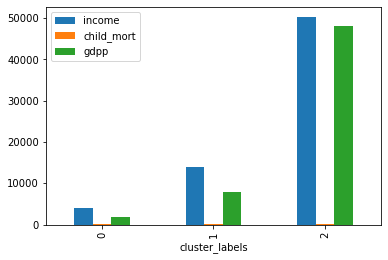

In [72]:
df_hm[['income','child_mort','gdpp','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar');


In [73]:
df_hm[['income','child_mort','gdpp','cluster_labels']].groupby('cluster_labels').mean()

,income,child_mort,gdpp
cluster_labels,,,
0,3897.354167,91.610417,1909.208333
1,13968.021978,20.357143,7979.912088
2,50178.571429,5.046429,48114.285714


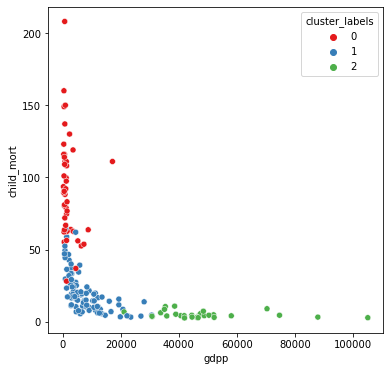

In [74]:

## Scatter Plot 
plt.figure(figsize = (6,6))
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels', data=df_hm, palette='Set1');

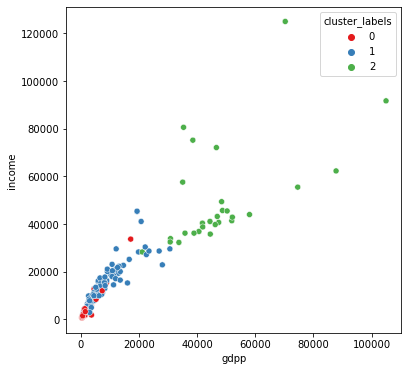

In [75]:
## Scatter Plot 
plt.figure(figsize = (6,6))
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels', data=df_hm, palette='Set1');

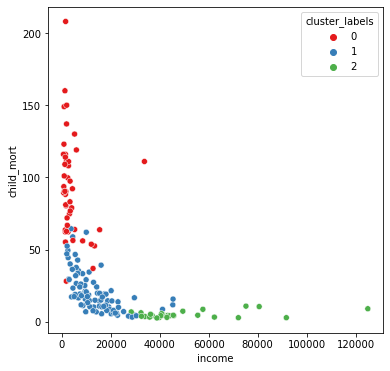

In [76]:
## Scatter Plot 
plt.figure(figsize = (6,6))
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels', data=df_hm, palette='Set1');

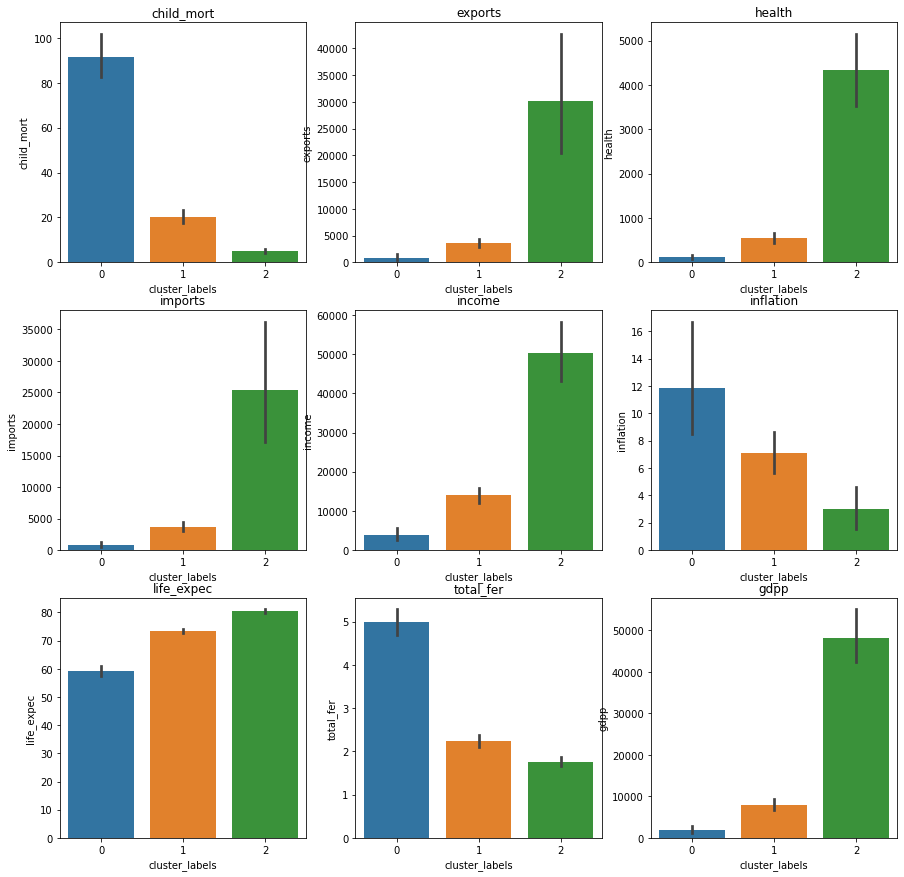

In [77]:
plt.figure(figsize = (15,15))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort")
sns.barplot(df_hm.cluster_labels, df_hm.child_mort)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports")
sns.barplot(df_hm.cluster_labels, df_hm.exports)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health")
sns.barplot(df_hm.cluster_labels, df_hm.health)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports")
sns.barplot(df_hm.cluster_labels, df_hm.imports)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income")
sns.barplot(df_hm.cluster_labels, df_hm.income)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation")
sns.barplot(df_hm.cluster_labels, df_hm.inflation)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec")
sns.barplot(df_hm.cluster_labels, df_hm.life_expec)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer")
sns.barplot(df_hm.cluster_labels, df_hm.total_fer)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp")
sns.barplot(df_hm.cluster_labels, df_hm.gdpp)

plt.show()

Inference:

- Developed countries: cluster_labels 2
- Developing countries: cluster_labels 1
- Under-developed countries: cluster_labels 0

In [78]:
country_list2 = df_hm[df_hm['cluster_labels']==0]
country_list2 = country_list2.reset_index().drop('index',axis=1)
country_list2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.440,56.2,5.82,553.0,0,0
1,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.400,60.1,6.16,3530.0,0,0
2,Benin,111.0,180.40,31.08,281.98,1820.0,0.880,61.8,5.36,758.0,0,0
3,Botswana,52.5,2768.60,527.05,3257.55,13300.0,8.920,57.1,2.88,6350.0,0,0
4,Burkina Faso,116.0,110.40,38.76,170.20,1430.0,6.810,57.9,5.87,575.0,0,0
5,Burundi,93.6,20.61,26.80,90.55,764.0,12.300,57.7,6.26,231.0,0,0
6,Cameroon,108.0,290.82,67.20,353.70,2660.0,1.910,57.3,5.11,1310.0,0,0
7,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.010,47.5,5.21,446.0,0,0
8,Chad,150.0,330.10,40.63,390.20,1930.0,6.390,56.5,6.59,897.0,0,0
9,Comoros,88.2,126.88,34.68,397.57,1410.0,3.870,65.9,4.75,769.0,0,0


In [79]:

#gdpp wise
country_list2.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False])
Top_10 = country_list1.reset_index().drop('index',axis=1)
Top_10.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.26,231.0,0
1,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.02,327.0,0
2,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.54,334.0,0
3,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,7.49,348.0,0
4,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,0
5,Madagascar,62.2,103.25,15.57,177.59,1390.0,8.79,60.8,4.60,413.0,0
6,Mozambique,101.0,131.99,21.83,193.58,918.0,7.64,54.5,5.56,419.0,0
7,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446.0,0
8,Malawi,90.5,104.65,30.25,160.19,1030.0,12.10,53.1,5.31,459.0,0
9,Eritrea,55.2,23.09,12.82,112.31,1420.0,11.60,61.7,4.61,482.0,0


In [80]:
top_10 = Top_10.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Burundi
1,Liberia
2,"Congo, Dem. Rep."
3,Niger
4,Sierra Leone
5,Madagascar
6,Mozambique
7,Central African Republic
8,Malawi
9,Eritrea


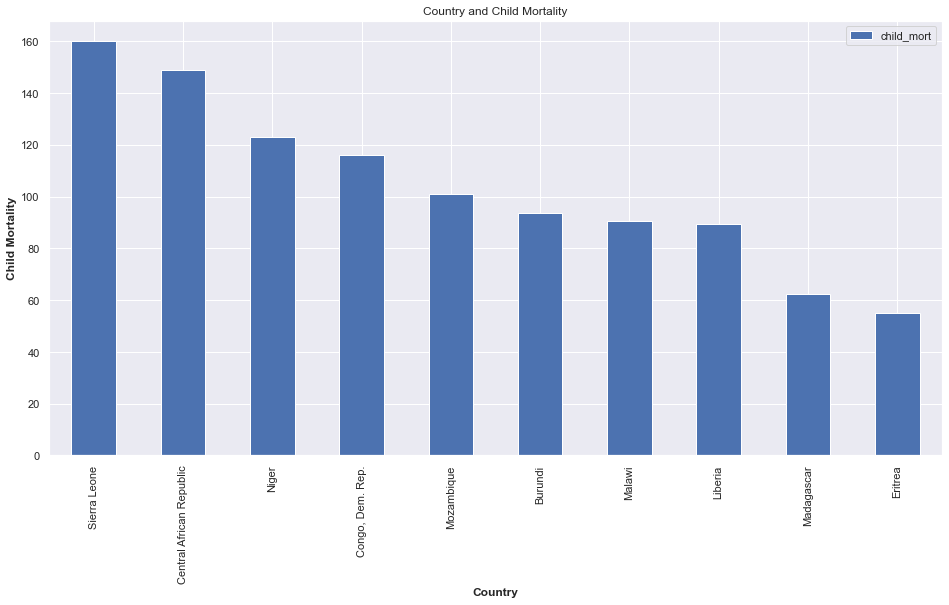

In [84]:
# BarPlot for Child Mortality of countries which are in need of aid:
countries_df_final = pd.DataFrame(top_10.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
countries_df_final.plot.bar()
plt.rcParams['figure.figsize'] = [16,8]
sns.set(style='darkgrid')
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

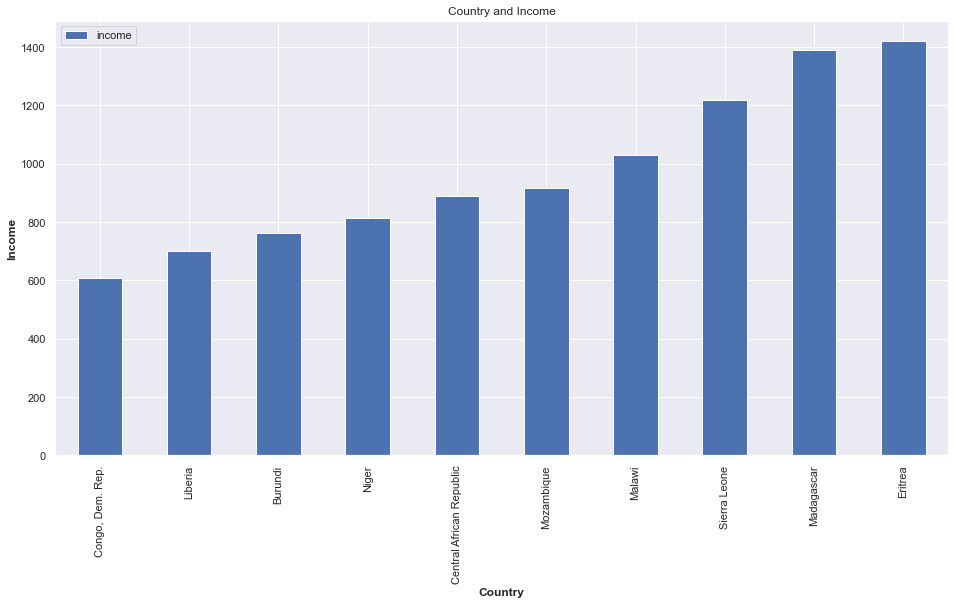

In [82]:
# BarPlot for Child Mortality of countries which are in need of aid:
countries_df_final = pd.DataFrame(top_10.groupby(['country'])['income'].mean().sort_values(ascending = True))
countries_df_final.plot.bar()
plt.rcParams['figure.figsize'] = [16,8]
sns.set(style='darkgrid')
plt.title('Country and Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Income", fontsize = 12, fontweight = 'bold')
plt.show()

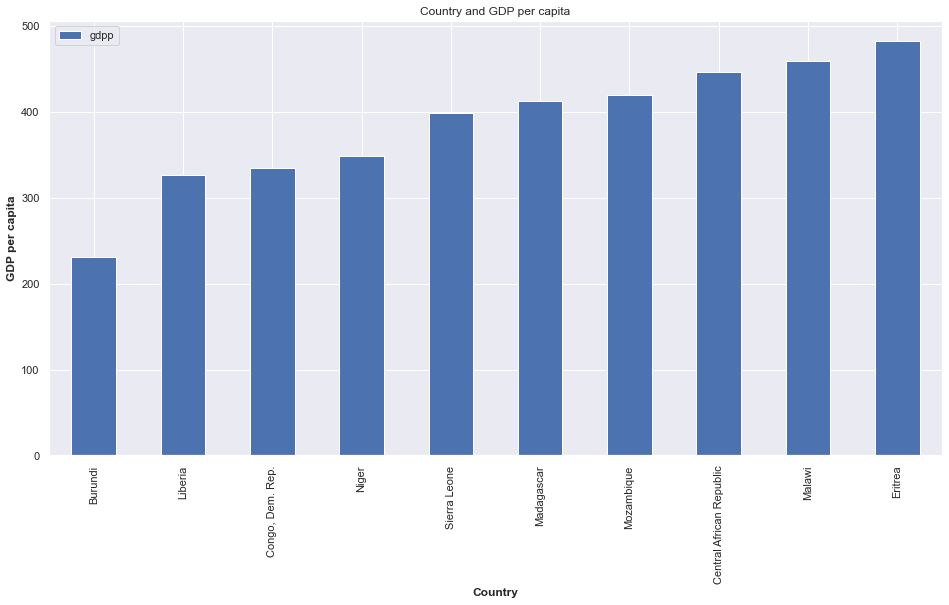

In [83]:
# BarPlot for GDP per capital of countries which are in need of aid:
countries_df_final = pd.DataFrame(top_10.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
countries_df_final.plot.bar()
plt.rcParams['figure.figsize'] = [16,8]
sns.set(style='darkgrid')
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

## Final list of countries which are in direst need of aid are:

1. Burundi
2.	Liberia
3.	Congo, Dem Rep
4.	Niger
5.	Sierra Leone
6.	Madagascar
7.	Mozambique
8.	Central African Republic
9.	Malawi
10.	Eritrea

We got same list of countries by both K-means and Heirarchical clustering.